### Практическое задание
* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [482]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

<H4><strong>Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.
</strong></H4>

In [483]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [484]:
st_x = X.copy()
st_x = np.array(st_x, dtype=np.float64)
scaler = StandardScaler()
for i, var in enumerate(st_x):
    scaler.fit(var.reshape(-1, 1))
    st_x[i] = scaler.transform(var.reshape(-1, 1)).reshape(1, -1)

st_x[0] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [485]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err
    
def eval_model_reg2(X, y, iterations, alpha=1e-2, lambda_=0):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W)
        # if i % (iterations / 10) == 0:
        #     print(i, W, err)
    return W

In [486]:
# gb_w = []
# l2_scale = np.arange(0, 5, 0.01)
# for i in l2_scale:
#     w = eval_model_reg2(st_x, y, 5000, lambda_=i)
    
#     for i, val in enumerate(w):
#         if i >= len(gb_w):
#             gb_w.append([val])
#         else:
#             gb_w[i].append(val)


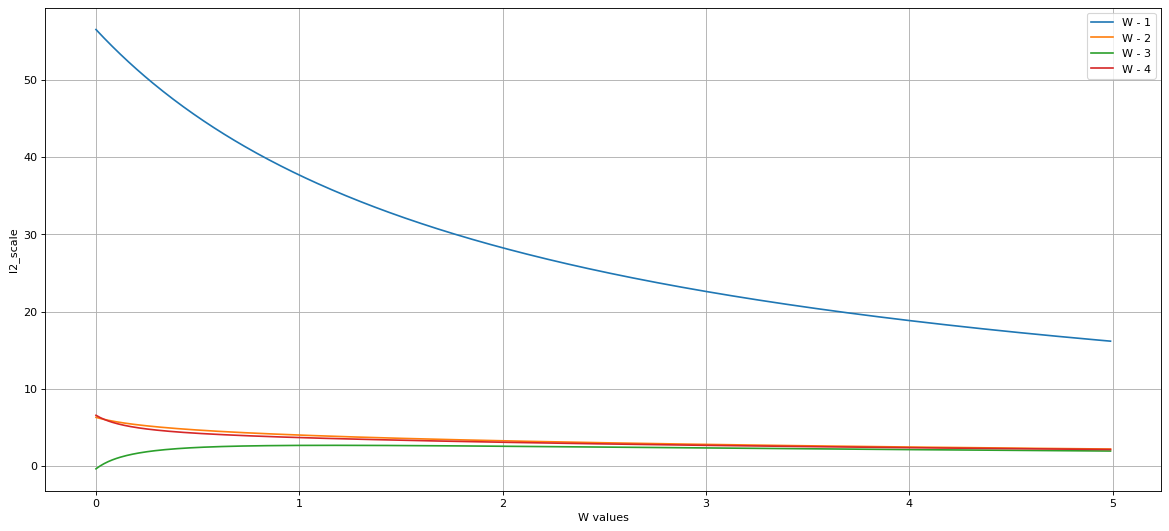

In [487]:
plt.figure(figsize=(18, 8), dpi=80)
# plt.xscale('log')
# plt.yscale('log')
plt.ylabel('l2_scale')
plt.xlabel('W values')
plt.grid(True)

for i, el in enumerate(gb_w):
    plt.plot(l2_scale, el, label= f'W - {i + 1}')
plt.legend()

<H4><strong>Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?</strong></H4>


In [488]:
from sklearn.preprocessing import MinMaxScaler

Рассмотрим один признак из массива X

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([ 450.,  605.,  760.,  915., 1070., 1225., 1380., 1535., 1690.,
        1845., 2000.]),
 <BarContainer object of 10 artists>)

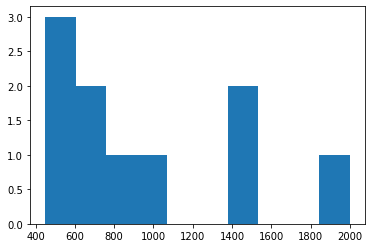

In [489]:
plt.hist(X[2])

Нормализуем значения

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

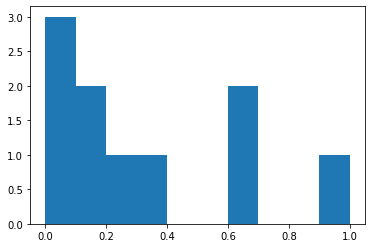

In [490]:
x_norm  = X[2].copy().astype(np.float64)

scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x_norm.reshape(-1, 1))

plt.hist(x_norm)

Теперь стандартизируем значения

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([-1.08270439, -0.76304881, -0.44339323, -0.12373764,  0.19591794,
         0.51557352,  0.8352291 ,  1.15488469,  1.47454027,  1.79419585,
         2.11385144]),
 <BarContainer object of 10 artists>)

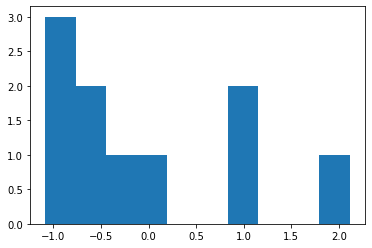

In [491]:
x_st  = x_norm.copy().astype(np.float64)
scaler = StandardScaler()
x_st = scaler.fit_transform(x_st.reshape(-1, 1))

plt.hist(x_st)

Сравним со значениями при стандартизации начального признака из массива x


(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([-1.08270439, -0.76304881, -0.44339323, -0.12373764,  0.19591794,
         0.51557352,  0.8352291 ,  1.15488469,  1.47454027,  1.79419585,
         2.11385144]),
 <BarContainer object of 10 artists>)

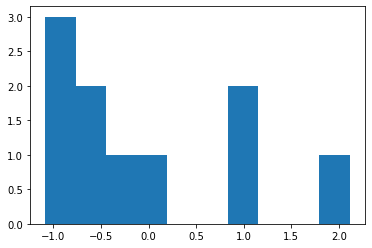

In [492]:
x_st  = X[2].copy().astype(np.float64)
scaler = StandardScaler()
x_st = scaler.fit_transform(x_st.reshape(-1, 1))

plt.hist(x_st)

Вывод: да к одному и тому же признаку можно применить и стандартизацию и нормализацию, это не влияет на конечный результат.

<H4><strong>Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.</strong></H4>


### $ \sum^n_{i = 0} (y_i - \sum^m_{i = 0}x_{ij}\cdot W_{ij})^2 \cdot \lambda \cdot \sum^m_{i=0} |W_{j}|$

### $L_1 = \lambda \cdot \sum^m_{i=0} |W_{j}|$

### $L_1' = |W_{j}|' = \frac{x}{|W|}$

### $W ≠ 0$


In [494]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err
    
def eval_model_reg2(X, y, iterations, alpha=1e-2, lambda_=0):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * (W / abs(W)))
        # if i % (iterations / 10) == 0:
        #     print(i, W, err)
    return W

In [495]:
eval_model_reg2(st_x, y, 5000, lambda_=i)

array([5.50000000e+01, 5.32105828e+00, 3.72282765e-02, 5.44047534e+00])